In [1]:
import random, numpy as np, pandas as pd
from matplotlib import pyplot as plt
alphap = 2
probp = 0.75
expon = 2 * alphap - 1

In [2]:
def betadist(alpha):
    """gives a random number from beta distribution"""
    return random.betavariate(alpha,alpha)

In [3]:
def decision(probability):
    """
    decides with a given probability whether to keep the right part
    """
    if float(probability) > random.random():
        return True
    else: 
        return False

In [4]:
def splitting(left,right):
    """
    splits a given segment. left and right are endpoints of the segment
    """
    segment = right - left
    xL = segment * betadist(alphap)
    xR = segment - xL
    splitpoint = left + xL
    flag = decision(probp)
    xLp = xL**expon
    xRp = xR**expon
    change = xLp + xRp - segment**expon
    return splitpoint, flag, xLp, xRp, change

In [5]:
def pickindex(expons, exponsum):
    """
    picks up a segment to be subsequently split
    """
    r = random.uniform(0, exponsum)
    sum_ = 0
    for index in range(len(expons)):
        sum_ += expons[index]
        if sum_ < r:
            continue
        else:
            return index

In [6]:
def number_length(points,flags):
    
    N = 0
    M = 0
    
    for i in range(len(flags)):
        if flags[i]:
            N += 1
            M += points[i+1] - points[i] 
            pass
        pass
    return N, M

In [7]:
def realization_value(total_iteration, min_iteration, iteration_step):
    
    points = [0.,1.]
    flags = [True]
    expons = [1.]
    exponsum = 1.0

    iteration_list = list(range(min_iteration, total_iteration + 1, iteration_step))
    N_realization = []
    M_realization = []
    
    for i in range(total_iteration + 1):
        
        index = pickindex(expons, exponsum)
        
        if flags[index] == True:
            left = points[index]
            right = points[index+1]
            splitpoint, flag, xLp, xRp, change = splitting(left,right)
            points.insert(index+1,splitpoint)
            flags.insert(index+1,flag)
            expons[index] = xLp 
            expons.insert(index+1,xRp)
            exponsum += change
            pass
        
        if i+1 in iteration_list:
            N, M = number_length(points,flags)
            N_realization.append(N)
            M_realization.append(M)
        pass
    
    N_list = np.array(N_realization)
    M_list = np.array(M_realization)
    
    return N_list, M_list

In [10]:
%timeit realization_value(100000, 50000, 5000)

The slowest run took 8.82 times longer than the fastest. This could mean that an intermediate result is being cached.
1.19 s ± 845 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [412]:
def ensemble_average(total_iteration = 1000, min_iteration = 100, iteration_step = 100, ensemble_size = 1000):

    data_points = int ((total_iteration - min_iteration)/iteration_step + 1)
    N_ensemble = np.zeros(data_points)
    M_ensemble = np.zeros(data_points)
   
    for i in range(ensemble_size):
        N_list, M_list = realization_value(total_iteration, min_iteration, iteration_step)
        N_ensemble += N_list
        M_ensemble += M_list
        pass
    
    N_average = N_ensemble/ensemble_size
    M_average = M_ensemble/ensemble_size
    
    return N_average, M_average

0.7803570105735553


<function matplotlib.pyplot.show(*args, **kw)>

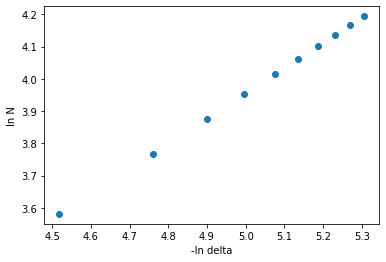

In [429]:
N_average, M_average = ensemble_average(10_000, 1_000, 1_000, 1_000)
N_log = np.log(N_average)
minus_delta_log = N_log - np.log(M_average)
slope, intercept = np.polyfit(minus_delta_log, N_log, 1)
print(slope)
plt.plot(minus_delta_log, N_log, "o")
plt.xlabel("-ln delta")
plt.ylabel("ln N")
plt.show

## Testing

In [16]:
def f():
    arr = [   ]
    for a in range(1000):
        arr.insert(0, a)
    return arr

In [17]:
%timeit f()

685 µs ± 10.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [18]:
def g():
    arr = [0]*1000
    i = 1000-1
    for a in range(1000):
        arr[i] = a
        i -= 1
    return arr

In [19]:
%timeit g()

129 µs ± 3.07 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [24]:
685/129

5.310077519379845

In [22]:
np.array(f())

array([999, 998, 997, 996, 995, 994, 993, 992, 991, 990, 989, 988, 987,
       986, 985, 984, 983, 982, 981, 980, 979, 978, 977, 976, 975, 974,
       973, 972, 971, 970, 969, 968, 967, 966, 965, 964, 963, 962, 961,
       960, 959, 958, 957, 956, 955, 954, 953, 952, 951, 950, 949, 948,
       947, 946, 945, 944, 943, 942, 941, 940, 939, 938, 937, 936, 935,
       934, 933, 932, 931, 930, 929, 928, 927, 926, 925, 924, 923, 922,
       921, 920, 919, 918, 917, 916, 915, 914, 913, 912, 911, 910, 909,
       908, 907, 906, 905, 904, 903, 902, 901, 900, 899, 898, 897, 896,
       895, 894, 893, 892, 891, 890, 889, 888, 887, 886, 885, 884, 883,
       882, 881, 880, 879, 878, 877, 876, 875, 874, 873, 872, 871, 870,
       869, 868, 867, 866, 865, 864, 863, 862, 861, 860, 859, 858, 857,
       856, 855, 854, 853, 852, 851, 850, 849, 848, 847, 846, 845, 844,
       843, 842, 841, 840, 839, 838, 837, 836, 835, 834, 833, 832, 831,
       830, 829, 828, 827, 826, 825, 824, 823, 822, 821, 820, 81

In [23]:
np.array(g())

array([999, 998, 997, 996, 995, 994, 993, 992, 991, 990, 989, 988, 987,
       986, 985, 984, 983, 982, 981, 980, 979, 978, 977, 976, 975, 974,
       973, 972, 971, 970, 969, 968, 967, 966, 965, 964, 963, 962, 961,
       960, 959, 958, 957, 956, 955, 954, 953, 952, 951, 950, 949, 948,
       947, 946, 945, 944, 943, 942, 941, 940, 939, 938, 937, 936, 935,
       934, 933, 932, 931, 930, 929, 928, 927, 926, 925, 924, 923, 922,
       921, 920, 919, 918, 917, 916, 915, 914, 913, 912, 911, 910, 909,
       908, 907, 906, 905, 904, 903, 902, 901, 900, 899, 898, 897, 896,
       895, 894, 893, 892, 891, 890, 889, 888, 887, 886, 885, 884, 883,
       882, 881, 880, 879, 878, 877, 876, 875, 874, 873, 872, 871, 870,
       869, 868, 867, 866, 865, 864, 863, 862, 861, 860, 859, 858, 857,
       856, 855, 854, 853, 852, 851, 850, 849, 848, 847, 846, 845, 844,
       843, 842, 841, 840, 839, 838, 837, 836, 835, 834, 833, 832, 831,
       830, 829, 828, 827, 826, 825, 824, 823, 822, 821, 820, 81

## Idea to make it faster

1. each insert takes 5 times more time than just assigining value
2. same for append. but append is called only a few times compared to insert
3. so we only need to replace insert method with something else
4. if we can find something where ordering or sequencing does not matter, this will be resolved
5. instead of points we can work with segment length only. and corresponding flag and probability. Like the table bellow

| length  | flag  | probability  |
|---|---|---|
|   |   |   |
|   |   |   |  
|   |   |   | 